In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            
    plt.show()

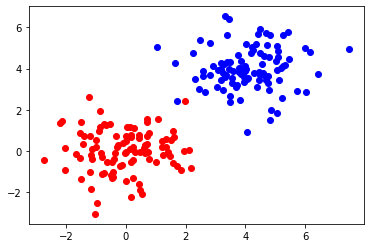

(2, 200)
(1, 200)


In [3]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+4
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

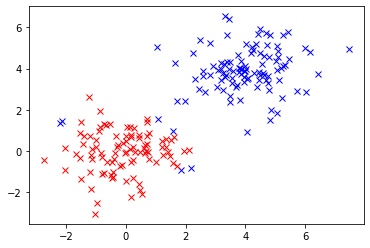

In [4]:
num_basis=5
basis=[]

for i in range(num_basis):
    for j in range(num_basis):
        base=(X[0,:]**i)*(X[1,:]**j)
        basis.append(base)

basis=np.array(basis)

eps=1e-6

def get_z(X,W):
    return W@X

def sigmoid(z):
    return 0.5*(1+np.tanh(0.5*z))

def get_loss(y,yhat):
    return np.sum(-y*np.log(yhat+eps)-(1-y)*np.log(1-yhat+eps),axis=1)

w=np.random.random((1,25))

lr=0.001
ls=[]
for i in range(10000):
    z=get_z(basis,w)
    yhat=sigmoid(z)
    l=get_loss(y,yhat)

    ls.append(l)
    dz=yhat-y
    dw=dz@basis.T

    w=w-lr*dw

plotClass(X,yhat>=0.5,'x')
plt.show()